## The impact of COVID-19 across various regions and demographics.
* Nadeen Abu Hilweh
* Data Science project

#### Problem Statement:
COVID-19 has affected people differently across regions and age groups. The available data is often messy and hard to understand. This project uses Python and data visualization to clean, analyze, and show key trends in COVID-19 data, making it easier to understand the pandemic’s impact.

#### Objective:
To clean, analyze, and visualize COVID-19 data using Python, helping to identify trends and patterns across regions and demographics for better understanding of the pandemic’s impact.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [29]:
df=pd.read_csv('covid-19set.csv')

#### Data Inspection

In [32]:
df.head() #Inspecting the first few rows of the DataFrame

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
0,Afghanistan,36263,1269.0,25198.0,9796.0,106.0,10.0,18.0,3.50,69.49,5.04,35526,737.0,2.07
1,Albania,4880,144.0,2745.0,1991.0,117.0,6.0,63.0,2.95,56.25,5.25,4171,709.0,17.00
2,Algeria,27973,1163.0,18837.0,7973.0,616.0,8.0,749.0,4.16,67.34,6.17,23691,4282.0,18.07
3,Andorra,907,52.0,803.0,52.0,10.0,NaN,NaN,5.73,88.53,6.48,884,23.0,2.60
4,Angola,950,41.0,242.0,667.0,18.0,1.0,NaN,4.32,25.47,16.94,749,201.0,26.84


In [34]:
df.tail() #Inspecting the last few rows of the DataFrame

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
181,Vietnam,431,NaN,365.0,66.0,11.0,NaN,NaN,NaN,84.69,NaN,384,47.0,12.24
182,West Bank and Gaza,10621,78.0,3752.0,6791.0,152.0,2.0,NaN,0.73,35.33,2.08,8916,1705.0,19.12
183,Western Sahara,10,1.0,8.0,1.0,NaN,NaN,NaN,10.00,80.00,12.50,10,NaN,NaN
184,Yemen,1691,483.0,833.0,375.0,10.0,4.0,36.0,28.56,49.26,57.98,1619,72.0,4.45
185,Zambia,4552,140.0,2815.0,1597.0,71.0,1.0,465.0,3.08,61.84,4.97,3326,1226.0,36.86


#### Data Informations:

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          186 non-null    object 
 1   Confirmed               186 non-null    int64  
 2   Deaths                  182 non-null    float64
 3   Recovered               182 non-null    float64
 4   Active                  185 non-null    float64
 5   New cases               177 non-null    float64
 6   New deaths              160 non-null    float64
 7   New recovered           167 non-null    float64
 8   Deaths / 100 Cases      183 non-null    float64
 9   Recovered / 100 Cases   183 non-null    float64
 10  Deaths / 100 Recovered  181 non-null    float64
 11  Confirmed last week     186 non-null    int64  
 12  1 week change           182 non-null    float64
 13  1 week % increase       182 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory

In [39]:
df.shape

(186, 14)

#### Handling Missing Values 

In [41]:
missing_values = df.isnull().sum()
print(missing_values)

Country/Region             0
Confirmed                  0
Deaths                     4
Recovered                  4
Active                     1
New cases                  9
New deaths                26
New recovered             19
Deaths / 100 Cases         3
Recovered / 100 Cases      3
Deaths / 100 Recovered     5
Confirmed last week        0
1 week change              4
1 week % increase          4
dtype: int64


In [61]:
# Filled missing values with 0 because the dataset is a snapshot for each country,
# and there is no previous data to perform a forward fill.
df['Deaths'] = df['Deaths'].fillna(0)
df['Recovered'] = df['Recovered'].fillna(0)
df['New cases'] = df['New cases'].fillna(0)
df['New deaths'] = df['New deaths'].fillna(0)
df['New recovered'] = df['New recovered'].fillna(0)

print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        3
Recovered / 100 Cases     3
Deaths / 100 Recovered    5
Confirmed last week       0
1 week change             4
1 week % increase         4
dtype: int64


In [63]:
# Calculate active cases by subtracting deaths and recovered from confirmed cases.
# This ensures consistency, especially for rows where active cases were missing.
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [65]:
print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        3
Recovered / 100 Cases     3
Deaths / 100 Recovered    5
Confirmed last week       0
1 week change             4
1 week % increase         4
dtype: int64


In [73]:
# Calculate the death rate as a percentage of confirmed cases.
# This replaces any missing values and standardizes the metric across all countries.
df['Deaths / 100 Cases'] = (df['Deaths'] / df['Confirmed']) * 100

In [75]:
print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     3
Deaths / 100 Recovered    5
Confirmed last week       0
1 week change             4
1 week % increase         4
dtype: int64


In [101]:
# Calculate the recovery rate as a percentage of confirmed cases.
# This standardizes the metric across all countries and handles missing values.
df['Recovered / 100 Cases'] = (df['Recovered'] / df['Confirmed']) * 100

In [103]:
print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    6
Confirmed last week       0
1 week change             0
1 week % increase         0
dtype: int64


In [109]:
# Calculating deaths per 100 recovered.
# Some values are NaN because Recovered = 0 in those rows, so division by zero is undefined.
df['Deaths / 100 Recovered'] = (df['Deaths'] / df['Recovered'].replace(0, pd.NA)) * 100

In [111]:
print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    6
Confirmed last week       0
1 week change             0
1 week % increase         0
dtype: int64


In [85]:
# Calculate the change in confirmed cases compared to last week.
df['1 week change'] = df['Confirmed'] - df['Confirmed last week']

In [87]:
print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    6
Confirmed last week       0
1 week change             0
1 week % increase         4
dtype: int64


In [97]:
# Calculate the percentage increase in confirmed cases compared to last week.
df['1 week % increase'] = (df['1 week change'] / df['Confirmed last week']) * 100

In [99]:
print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    6
Confirmed last week       0
1 week change             0
1 week % increase         0
dtype: int64


#### Data Cleaning


In [114]:
Duplicates_value= df.drop_duplicates() # Remove duplicate rows to ensure each record is unique

#### Data description

In [117]:
#Displaying descriptive statistics of the DataFrame
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Confirmed last week,1 week change,1 week % increase
count,1.860000e+02,186.000000,1.860000e+02,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.000000,1.860000e+02,186.000000,186.000000
mean,8.859022e+04,3516.129032,5.090078e+04,3.417331e+04,1228.500000,29.102151,938.704301,3.028392,65.061068,7.909629e+04,9493.930108,13.368185
std,3.843017e+05,14135.756175,1.906658e+05,2.138890e+05,5725.283016,120.344754,4208.515123,3.461477,26.151221,3.391392e+05,47615.227387,24.358579
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+01,-47.000000,-3.843009
25%,1.107000e+03,18.250000,6.487500e+02,1.407500e+02,4.000000,0.000000,0.000000,0.940589,49.689629,1.045250e+03,48.000000,2.760715
50%,5.633500e+03,110.000000,2.860000e+03,1.599500e+03,49.000000,1.000000,20.500000,2.152106,71.473110,5.329500e+03,418.000000,6.889800
75%,4.082025e+04,741.000000,2.292400e+04,9.281500e+03,419.750000,6.000000,222.000000,3.880377,86.892270,3.715275e+04,3248.500000,16.545753
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.562980,100.000000,3.834677e+06,455582.000000,226.315789


#### Plots

In [123]:
##useing groupby to collect data
region_deaths = df.groupby('Country/Region')['Deaths'].sum().reset_index()

In [125]:
region_deaths

,Country/Region,Deaths
0,Afghanistan,1269.0
1,Albania,144.0
2,Algeria,1163.0
3,Andorra,52.0
4,Angola,41.0
...,...,...
181,Vietnam,0.0
182,West Bank and Gaza,78.0
183,Western Sahara,1.0
184,Yemen,483.0


#### pie plot

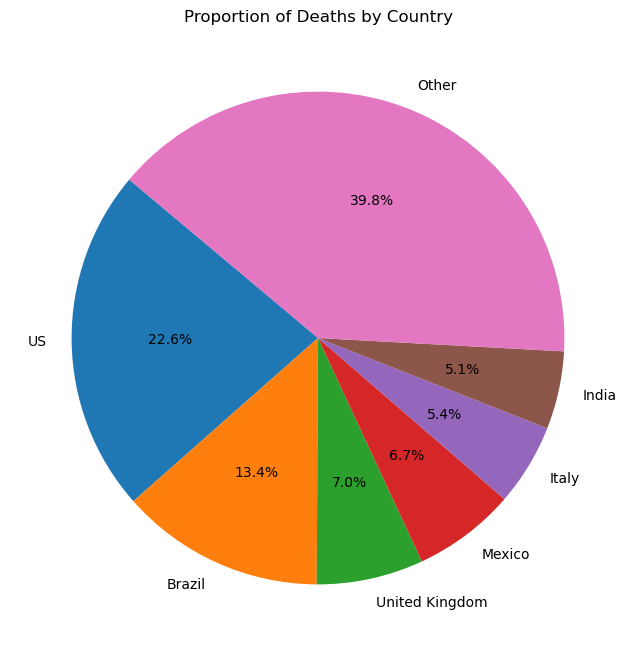

In [130]:
# Select the top 6 countries by number of deaths and group the rest into "Other" 
# to make the pie chart clearer and less cluttered
top_countries = df.sort_values(by='Deaths', ascending=False).head(6)
other = pd.DataFrame({
    'Country/Region': ['Other'],
    'Deaths': [df['Deaths'].sum() - top_countries['Deaths'].sum()]
})
plot_data = pd.concat([top_countries, other])
# to make the pie chart 
plt.figure(figsize=(8,8))
plt.pie(plot_data['Deaths'], labels=plot_data['Country/Region'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Deaths by Country')
plt.show()

#### Bar plot 

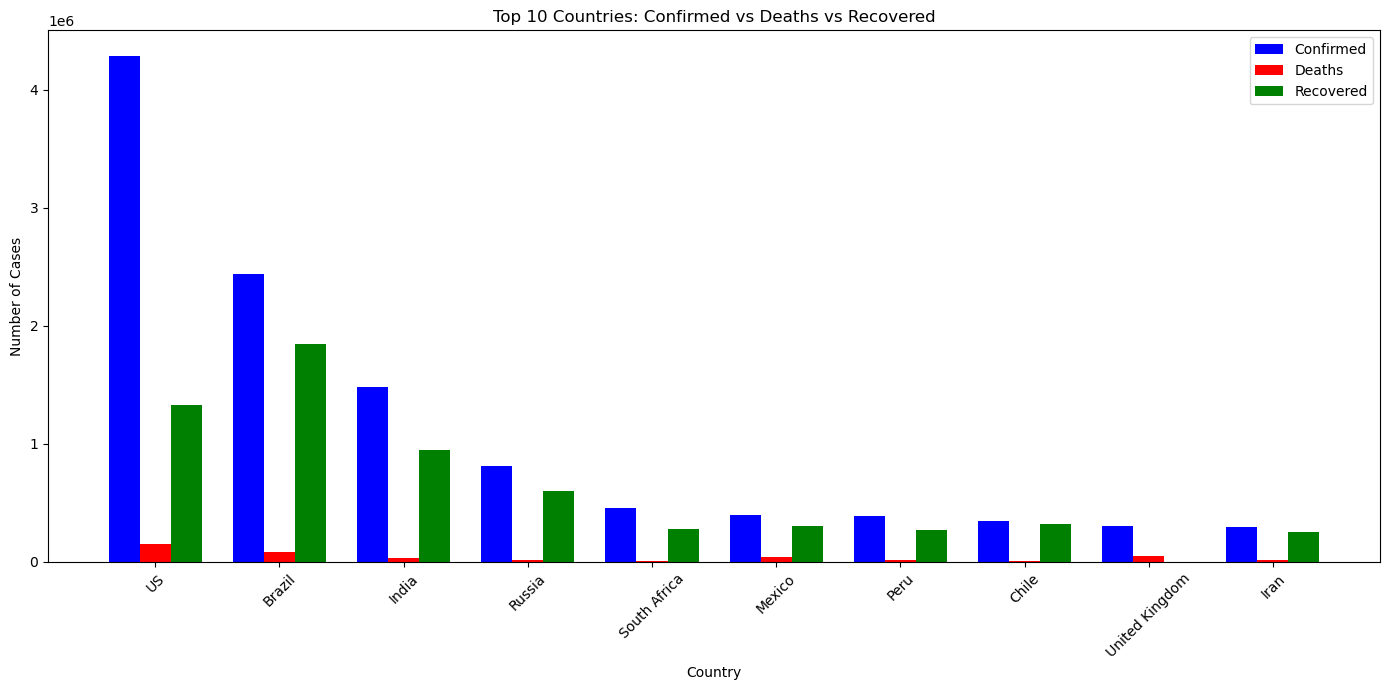

In [139]:
# Creating a bar plot to compare Confirmed, Deaths, and Recovered cases 
# for the top 10 countries with the highest confirmed cases
top10 = df.sort_values(by='Confirmed', ascending=False).head(10)
#Defining the axes
countries = top10['Country/Region']
confirmed = top10['Confirmed']
deaths = top10['Deaths']
recovered = top10['Recovered']

#Creating a bar plot
import numpy as np

x = np.arange(len(countries))
width = 0.25

plt.figure(figsize=(14,7))
plt.bar(x - width, confirmed, width=width, color='blue', label='Confirmed')
plt.bar(x, deaths, width=width, color='red', label='Deaths')
plt.bar(x + width, recovered, width=width, color='green', label='Recovered')

# labels
plt.xticks(x, countries, rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.title('Top 10 Countries: Confirmed vs Deaths vs Recovered')
plt.legend()
plt.tight_layout()
plt.show()

#### Box plot 

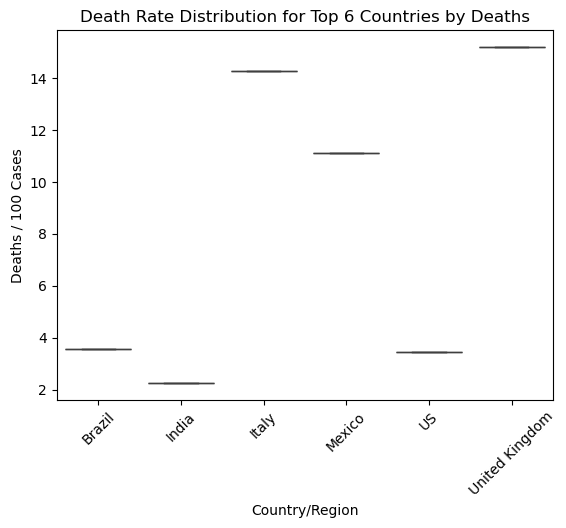

In [153]:
# This plot visualizes the distribution of COVID-19 death rates (Deaths per 100 Cases) 
# for the top 6 countries with the highest number of deaths. 
# It uses a boxplot to show the spread, median, and potential outliers of death rates,
# allowing for a clear comparison between these countries.

# Select the top 6 countries with the highest number of deaths
top_countries = df.sort_values(by='Deaths', ascending=False).head(6)['Country/Region']
# Filter the dataset to include only these top countries
df_top = df[df['Country/Region'].isin(top_countries)]

# Create a boxplot showing the distribution of death rates for the selected countries
sns.boxplot(x='Country/Region', y='Deaths / 100 Cases', data=df_top)
plt.title('Death Rate Distribution for Top 6 Countries by Deaths')
plt.xticks(rotation=45)
plt.show()

### What is the average number of confirmed cases across all countries?

In [156]:
avg_confirmed = df['Confirmed'].mean()
print("Average confirmed cases:", avg_confirmed)

Average confirmed cases: 88590.22043010753


### What is the total number of cases (Confirmed, Deaths, Recovered) globally?

In [175]:
total_confirmed = df['Confirmed'].sum()
total_deaths = df['Deaths'].sum()
total_recovered = df['Recovered'].sum()
print("Global totals Confirmed:", total_confirmed)
print("Global totals Deaths:", total_deaths)
print("Global totals Recovered:", total_recovered)

Global totals Confirmed: 16477781
Global totals Deaths: 654000.0
Global totals Recovered: 9467545.0


### What is the highest number of recoveries reported ?

In [178]:
max_recovered = df['Recovered'].max()
print("Highest number of recoveries", max_recovered)

Highest number of recoveries 1846641.0


### What is the percentage of deaths out of the total confirmed cases?

In [159]:
tot_death_rate = (df['Deaths'].sum() / df['Confirmed'].sum()) * 100
print("Global Death Rate (%):", tot_death_rate)

Global Death Rate (%): 3.968981017528998


### Which Country/Region has the highest average number of deaths per reported entry?

In [162]:
# Calculate the average number of deaths per reported entry for each country
avg_deaths_by_country = df.groupby('Country/Region')['Deaths'].mean()

# Find the country with the highest average deaths
highest_avg_deaths_country = avg_deaths_by_country.idxmax()
highest_avg_deaths_value = avg_deaths_by_country.max()

print("Country/Region with the highest average number of deaths per reported entry:", highest_avg_deaths_country)
print("Average deaths:", highest_avg_deaths_value)

Country/Region with the highest average number of deaths per reported entry: US
Average deaths: 148011.0


### Which countries have the highest average active cases?

In [164]:
df['Active Cases'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
country_active_avg = df.groupby('Country/Region')['Active Cases'].mean()
print("\nAverage Active Cases by Country:")
print(country_active_avg)


Average Active Cases by Country:
Country/Region
Afghanistan           9796.0
Albania               1991.0
Algeria               7973.0
Andorra                 52.0
Angola                 667.0
                       ...  
Vietnam                 66.0
West Bank and Gaza    6791.0
Western Sahara           1.0
Yemen                  375.0
Zambia                1597.0
Name: Active Cases, Length: 186, dtype: float64


### Which country has the highest number of confirmed cases compared to others?

Country with the highest number of confirmed cases: US
Number of confirmed cases: 4290259


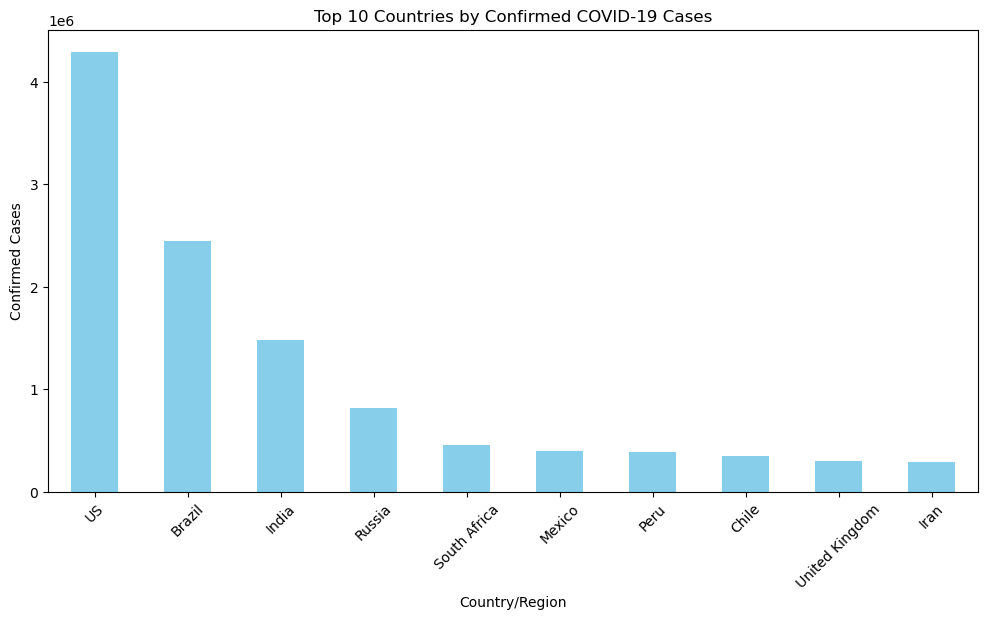

In [212]:
# Grouping the data by country and summing confirmed cases
country_confirmed = df.groupby('Country/Region')['Confirmed'].sum()

# Finding the country with the highest confirmed cases
top_country = country_confirmed.idxmax()
top_cases = country_confirmed.max()

print("Country with the highest number of confirmed cases:", top_country)
print("Number of confirmed cases:", top_cases)

# Optional: Create a bar plot for visualization of top 10 countries
top10 = country_confirmed.sort_values(ascending=False).head(10)
top10.plot(kind='bar', color='skyblue', figsize=(12,6))
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


### What is the overall correlation between 'Confirmed', 'Deaths', 'Recovered'?

In [170]:
# Calculate the correlation matrix between Confirmed, Deaths, and Recovered cases
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()
print("\nCorrelation for: ")
print(correlation_matrix)


Correlation for: 
           Confirmed   Deaths  Recovered
Confirmed   1.000000  0.93468   0.906351
Deaths      0.934680  1.00000   0.832040
Recovered   0.906351  0.83204   1.000000


### Are there any countries with unusually high death rates compared to their confirmed cases?

In [228]:
df['Active Cases'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
low_active = df.groupby('Country/Region')['Active Cases'].mean().sort_values().head(10)
print(low_active)

Country/Region
Brunei            0.0
Holy See          0.0
Dominica          0.0
Grenada           0.0
San Marino        0.0
Laos              1.0
Greenland         1.0
Western Sahara    1.0
Mauritius         2.0
Saint Lucia       2.0
Name: Active Cases, dtype: float64


### Which countries show unusually high recovery rates compared to deaths?

In [231]:
df['Recovery Rate (%)'] = (df['Recovered'] / df['Confirmed']) * 100
high_recovery = df.groupby('Country/Region')['Recovery Rate (%)'].mean().sort_values(ascending=False).head(10)
print(high_recovery)

Country/Region
Holy See       100.000000
Grenada        100.000000
Dominica       100.000000
Djibouti        98.379126
Iceland         98.327940
Brunei          97.872340
New Zealand     97.238279
Qatar           97.017254
Malaysia        96.597035
Mauritius       96.511628
Name: Recovery Rate (%), dtype: float64


### How have confirmed cases changed over time in the top 3 most affected countries?

In [242]:
top_countries = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(3).index

for country in top_countries:
    country_data = df[df['Country/Region'] == country]
    print(f"\nConfirmed cases over time for {country}:")
    print(country_data['Confirmed'].reset_index(drop=True))



Confirmed cases over time for US:
0    4290259
Name: Confirmed, dtype: int64

Confirmed cases over time for Brazil:
0    2442375
Name: Confirmed, dtype: int64

Confirmed cases over time for India:
0    1480073
Name: Confirmed, dtype: int64


### Which countries have the highest ratio of deaths to recoveries

In [245]:
df['Death/Recovery Ratio'] = df['Deaths'] / df['Recovered']
ratio_top = df.groupby('Country/Region')['Death/Recovery Ratio'].mean().sort_values(ascending=False).head(10)
print(ratio_top)

Country/Region
Canada                  inf
Syria                   inf
Serbia                  inf
Mozambique              inf
Sweden                  inf
Netherlands       32.592593
United Kingdom    31.902575
Yemen              0.579832
Belgium            0.562801
France             0.372014
Name: Death/Recovery Ratio, dtype: float64
